In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('avocado.csv')

df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. 
Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. 
Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [17]:
# Dropping the irrelevant column Unnamed:0

df.drop("Unnamed: 0", axis = 1, inplace = True)

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [18]:
# Check top 5 rows

df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
# Check bottom 5 rows

df.tail(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Lets start Exploratory Data Analysis.

In [20]:
df.shape

(18249, 13)

In [22]:
# Lets check their datatype

df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [24]:
# Lets change date column from object data type to datetime data type

df['Date'] = pd.to_datetime(df['Date'])

In [25]:
# extract Month & day from date

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [27]:
df.drop('Date',axis = 1, inplace = True)

In [28]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [29]:
# After dropping 'Date' column we can check new data frame

df.shape

(18249, 14)

In [30]:
# checking null parameters

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [31]:
# Checking null values in the dataset

df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

<AxesSubplot:>

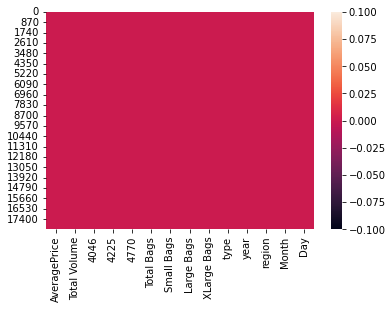

In [32]:
# visualize the null values in heatmap

sns.heatmap(df.isnull())

In [33]:
# Check columns in the dataset

df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [34]:
# Check data uniqueness in target variable

df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [35]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [36]:
# List of values in the target variable

df["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [37]:
## Statistcal description of dataset

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# Seperating numerical and catagorical data columns

In [38]:
# for categorical columns

categorical_col = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)

print(categorical_col)

['type', 'region']


In [39]:
# we have 2 columns as catagorical columns which we need to encode using one hot encoder or label encoder.

In [40]:
# Now checking for numerical columns

numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)

print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# DATA VISUALIZATION

Univariate analysis

conventional    9126
organic         9123
Name: type, dtype: int64


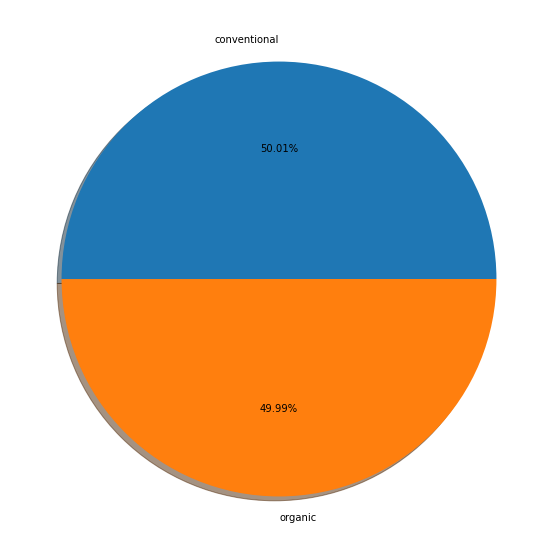

In [41]:
#Visualize the count of type of the avocado

print(df['type'].value_counts())

labels='conventional','organic'

fig, ax = plt.subplots(figsize = (10, 10))

ax.pie(df['type'].value_counts(), labels = labels, autopct = '%1.2f%%', shadow = True)

plt.show()

In [42]:
# above plot shows demand of both type of avocados being equal.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


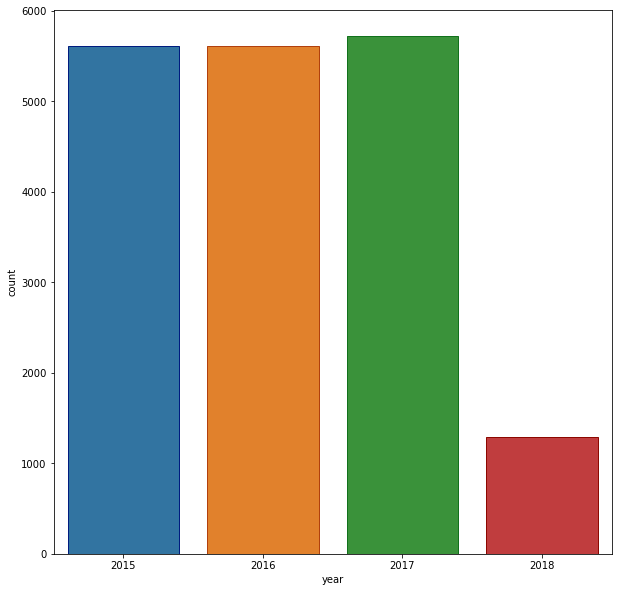

In [43]:
# count of year

print(df['year'].value_counts())

plt.figure(figsize = (10, 10))

sns.countplot(df['year'], edgecolor = sns.color_palette("dark", 5))

plt.show()

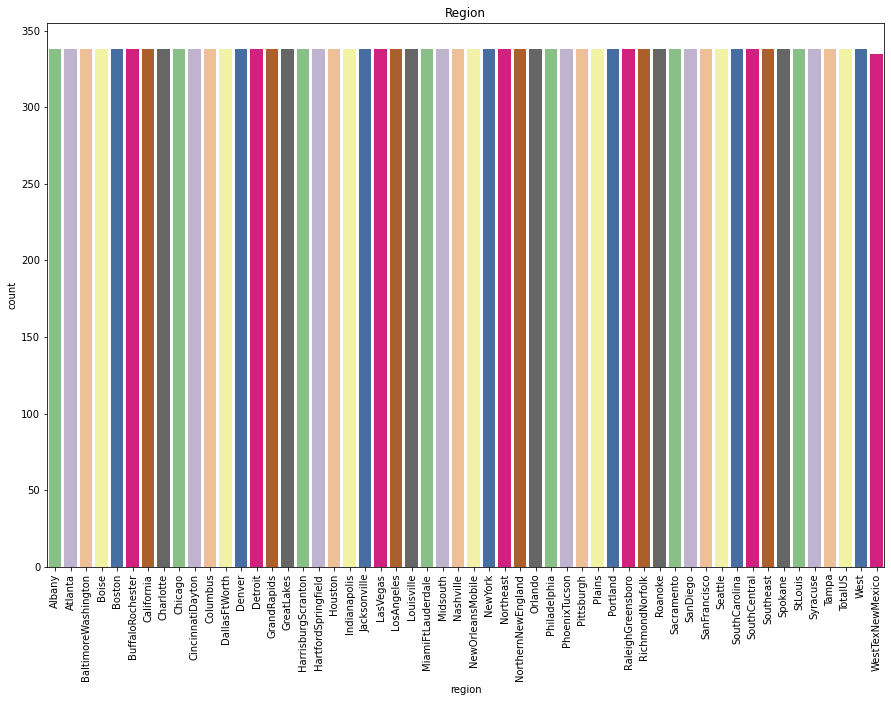

In [44]:
#Visualize the count of year

plt.figure(figsize = (15, 10))

sns.countplot(df['region'], palette = 'Accent')

plt.title('Region')

plt.xticks(rotation = 90)

plt.show()

# Lets check data distribution

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


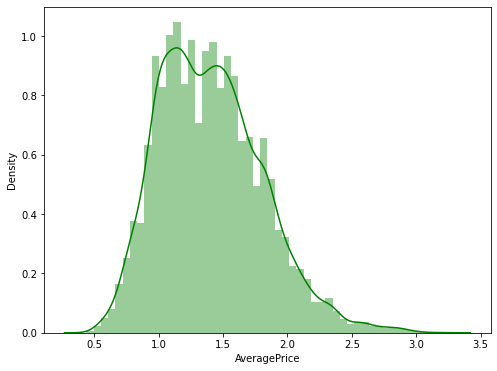

In [45]:
# Distribution plot for target variable AveragePrice

print(df["AveragePrice"].value_counts())

plt.figure(figsize = (8, 6))

sns.distplot(df["AveragePrice"], color = 'g')

plt.show()

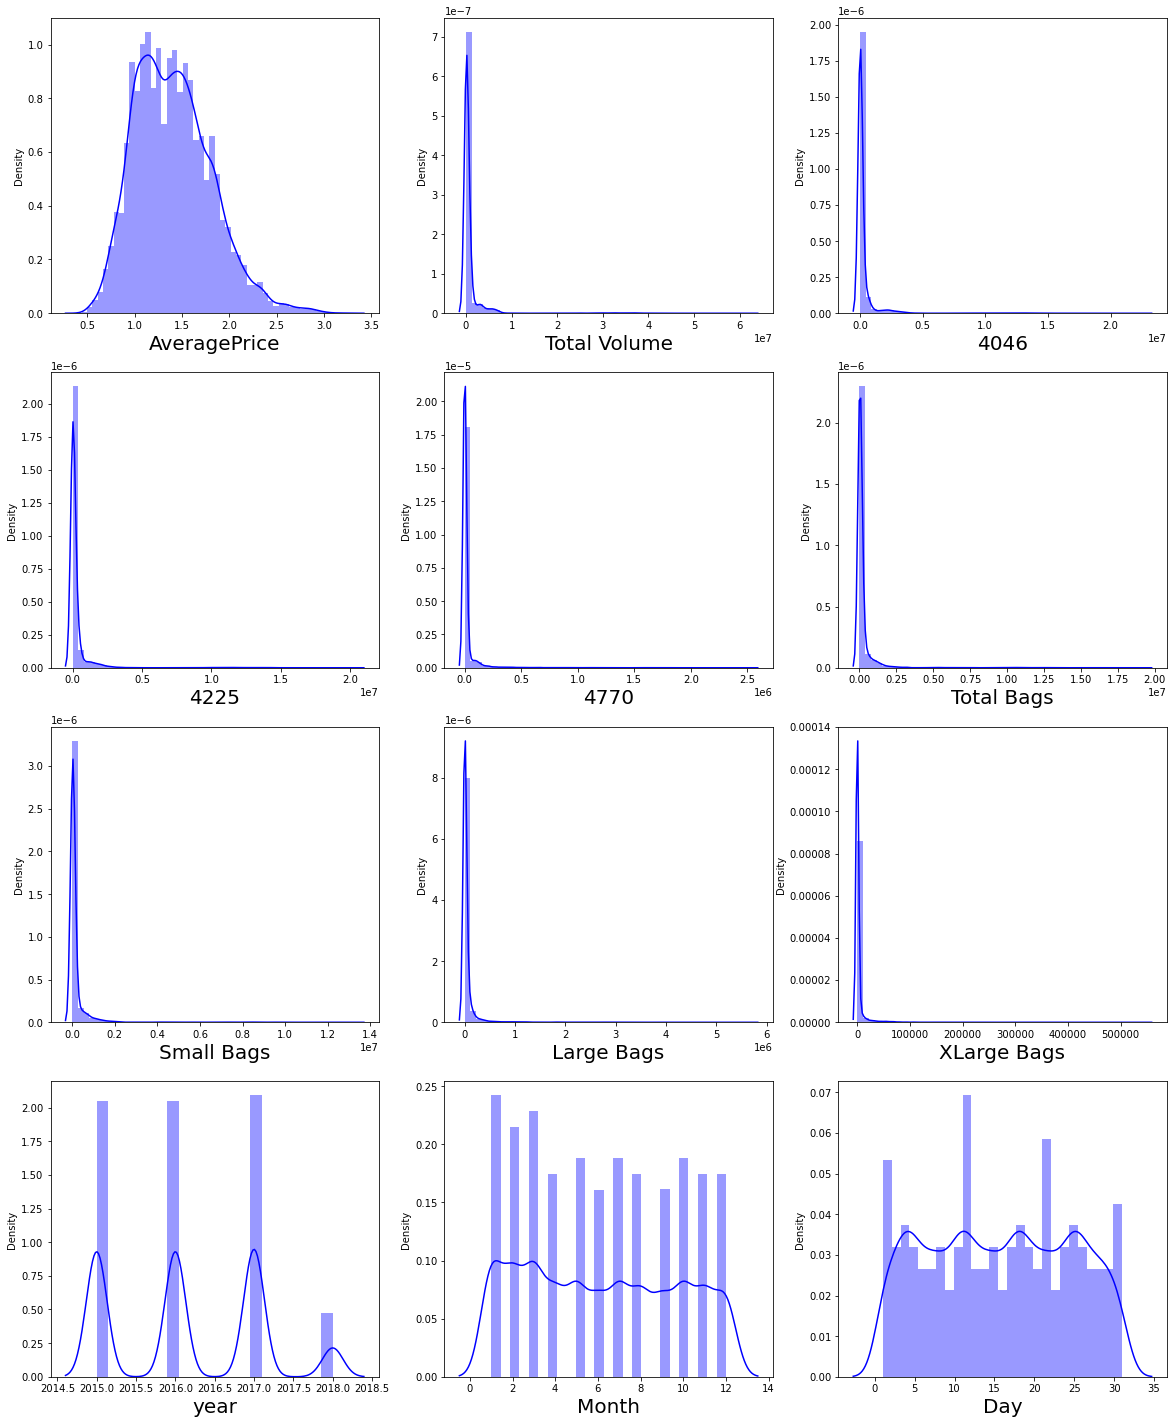

In [46]:
plt.figure(figsize=(20, 25), facecolor='white')

plotnumber = 1

for column in numerical_col:
    if plotnumber <= 14:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column, fontsize = 20)
        plotnumber+=1
        
plt.show()


Text(0, 0.5, 'AveragePrice')

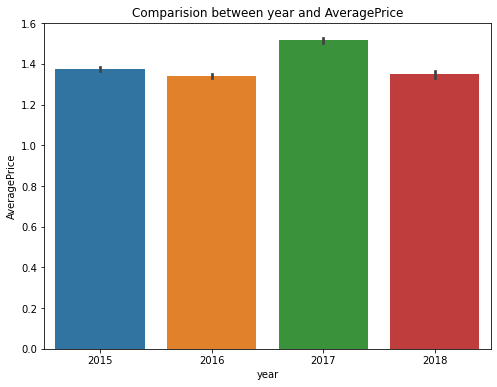

In [47]:
# Checking which year has maximum AveragePrice

plt.figure(figsize = [8, 6])

plt.title('Comparision between year and AveragePrice')

sns.barplot(df['year'], df['AveragePrice'], data = df);

plt.xlabel('year')

plt.ylabel('AveragePrice')

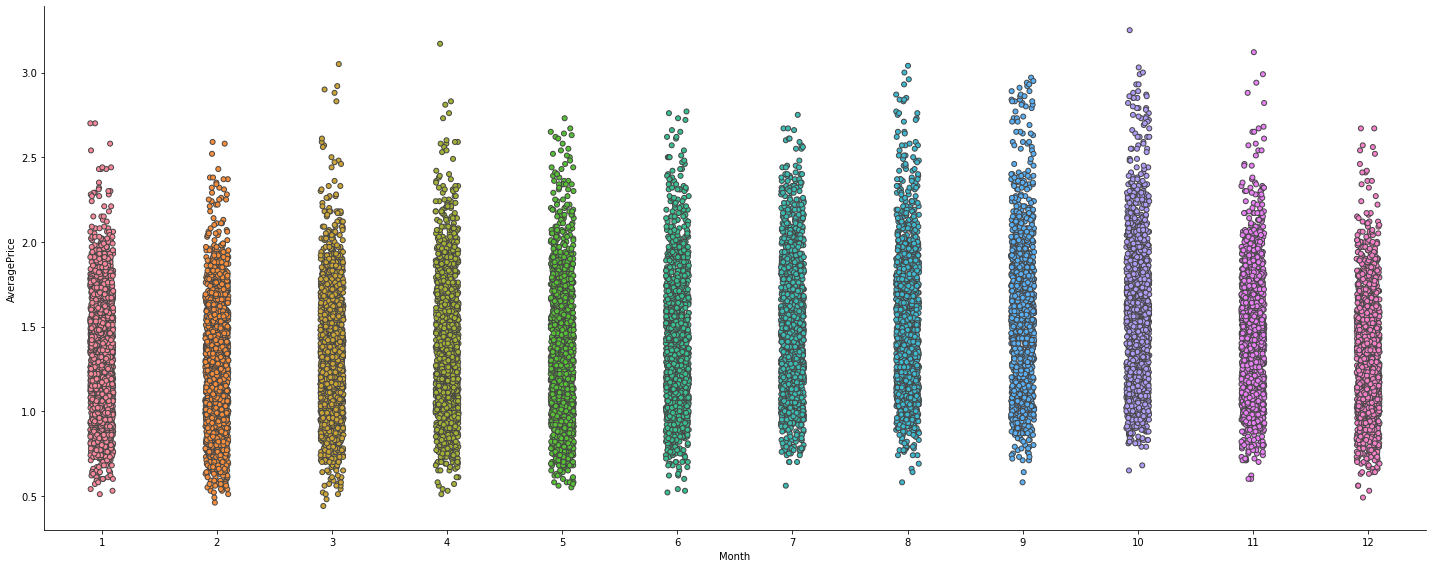

In [48]:
sns.catplot(x = 'Month', y = 'AveragePrice', kind = 'strip', data = df, height = 8, linewidth = 1, aspect = 2.5)


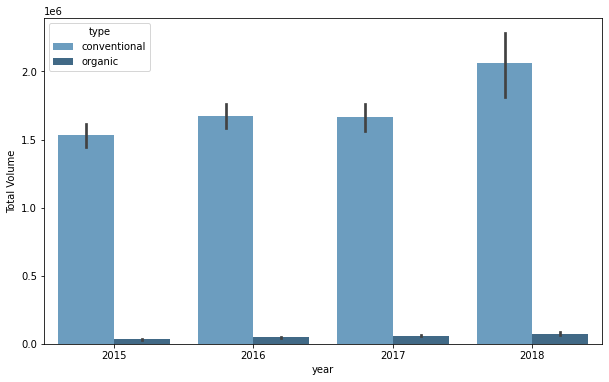

In [49]:
plt.figure(figsize = (10, 6))

sns.barplot(x = 'year', y = 'Total Volume', hue = 'type', data = df, palette = 'Blues_d', ci = 68)

plt.show()

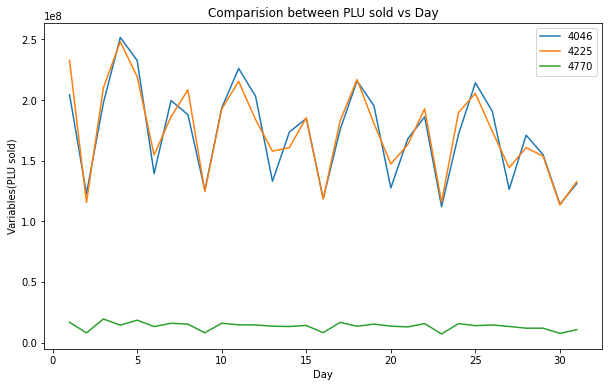

In [50]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()

variables.plot(kind = 'line', fontsize = 10, figsize = (10, 6))

plt.title('Comparision between PLU sold vs Day')

plt.xlabel('Day')

plt.ylabel('Variables(PLU sold)')

plt.show()

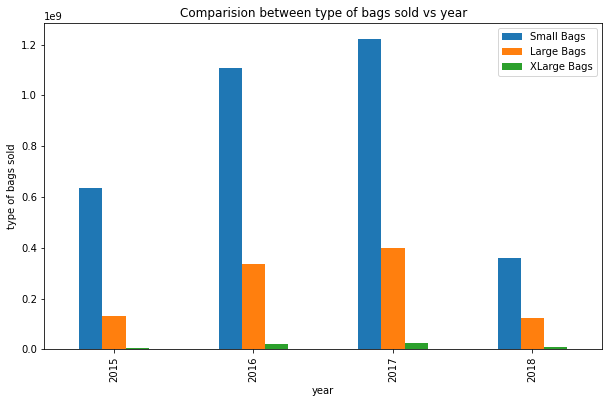

In [51]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.year).sum()

feature.plot(kind = 'bar', fontsize = 10, figsize = (10, 6))

plt.title('Comparision between type of bags sold vs year')

plt.xlabel('year')

plt.ylabel('type of bags sold')

plt.show()

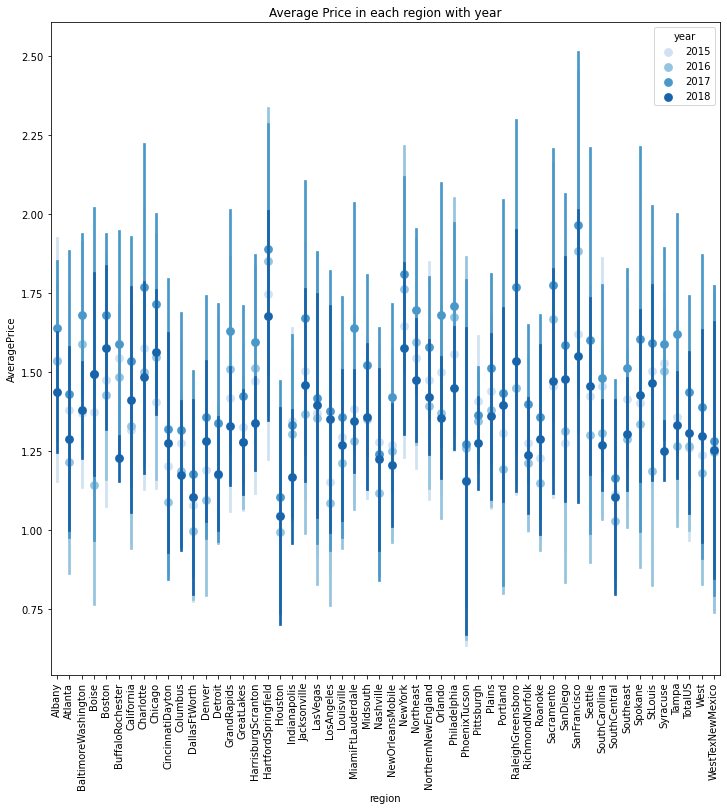

In [52]:
plt.figure(figsize = (12, 12))

plt.title('Average Price in each region with year')

sns.pointplot(x = 'region', y = 'AveragePrice', data = df, hue = 'year', join = False, palette = 'Blues', ci = 'sd')

plt.xticks(rotation = 90)

plt.show()

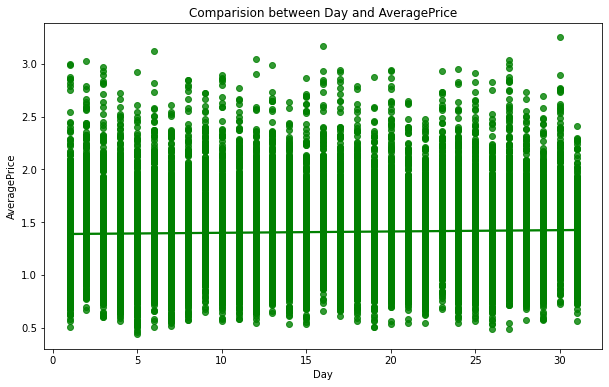

In [53]:
plt.figure(figsize = [10, 6])

plt.title('Comparision between Day and AveragePrice')

sns.regplot(df['Day'], df['AveragePrice'], color = 'g');

plt.show()

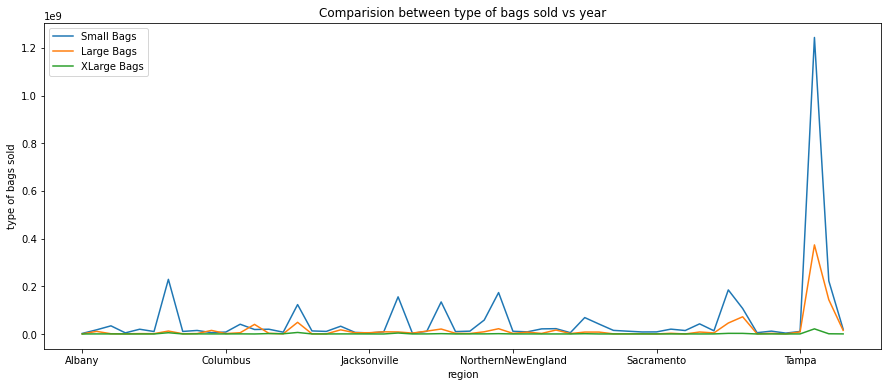

In [54]:
feature = df[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(df.region).sum()

feature.plot(kind = 'line', fontsize = 10, figsize = (15, 6))

plt.title('Comparision between type of bags sold vs year')

plt.xlabel('region')

plt.ylabel('type of bags sold')

plt.show()

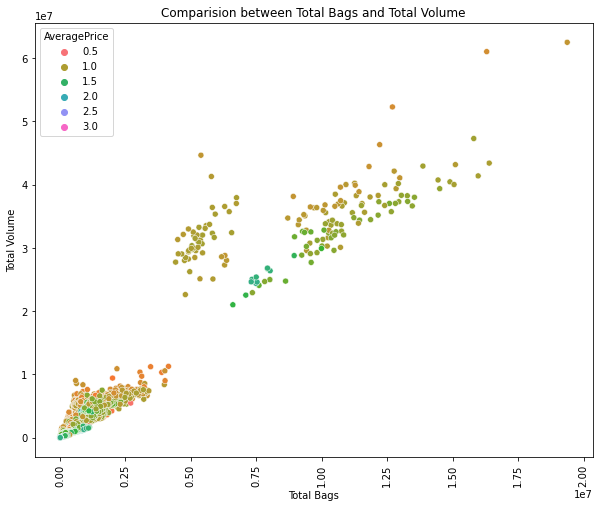

In [55]:
plt.figure(figsize = (10, 8))

plt.title('Comparision between Total Bags and Total Volume')

sns.scatterplot(x = 'Total Bags', y = 'Total Volume', hue = 'AveragePrice', data = df, palette = 'husl')

plt.xticks(rotation = 90)

plt.show()

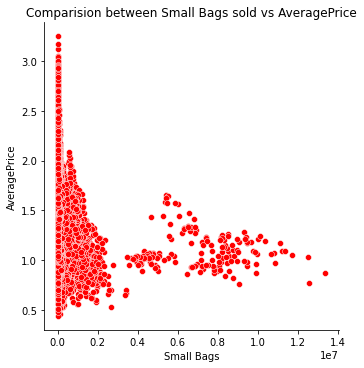

In [56]:
sns.relplot(df['Small Bags'], df['AveragePrice'], color = 'r');

plt.title('Comparision between Small Bags sold vs AveragePrice')

plt.xlabel('Small Bags')

plt.ylabel('AveragePrice')

plt.show()

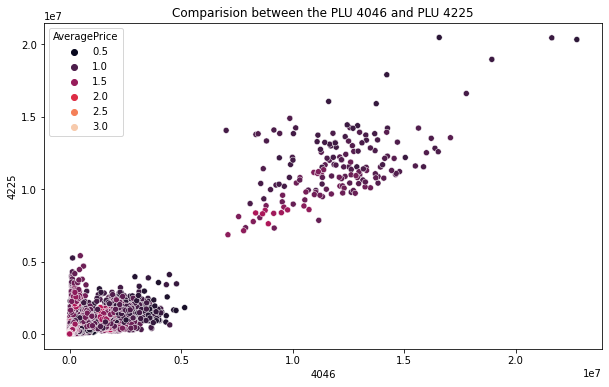

In [57]:
plt.figure(figsize = (10, 6))

plt.title('Comparision between the PLU 4046 and PLU 4225')

sns.scatterplot(df['4046'], df['4225'], hue = df['AveragePrice'], palette = 'rocket')

plt.show()

# Multivariate Analysis

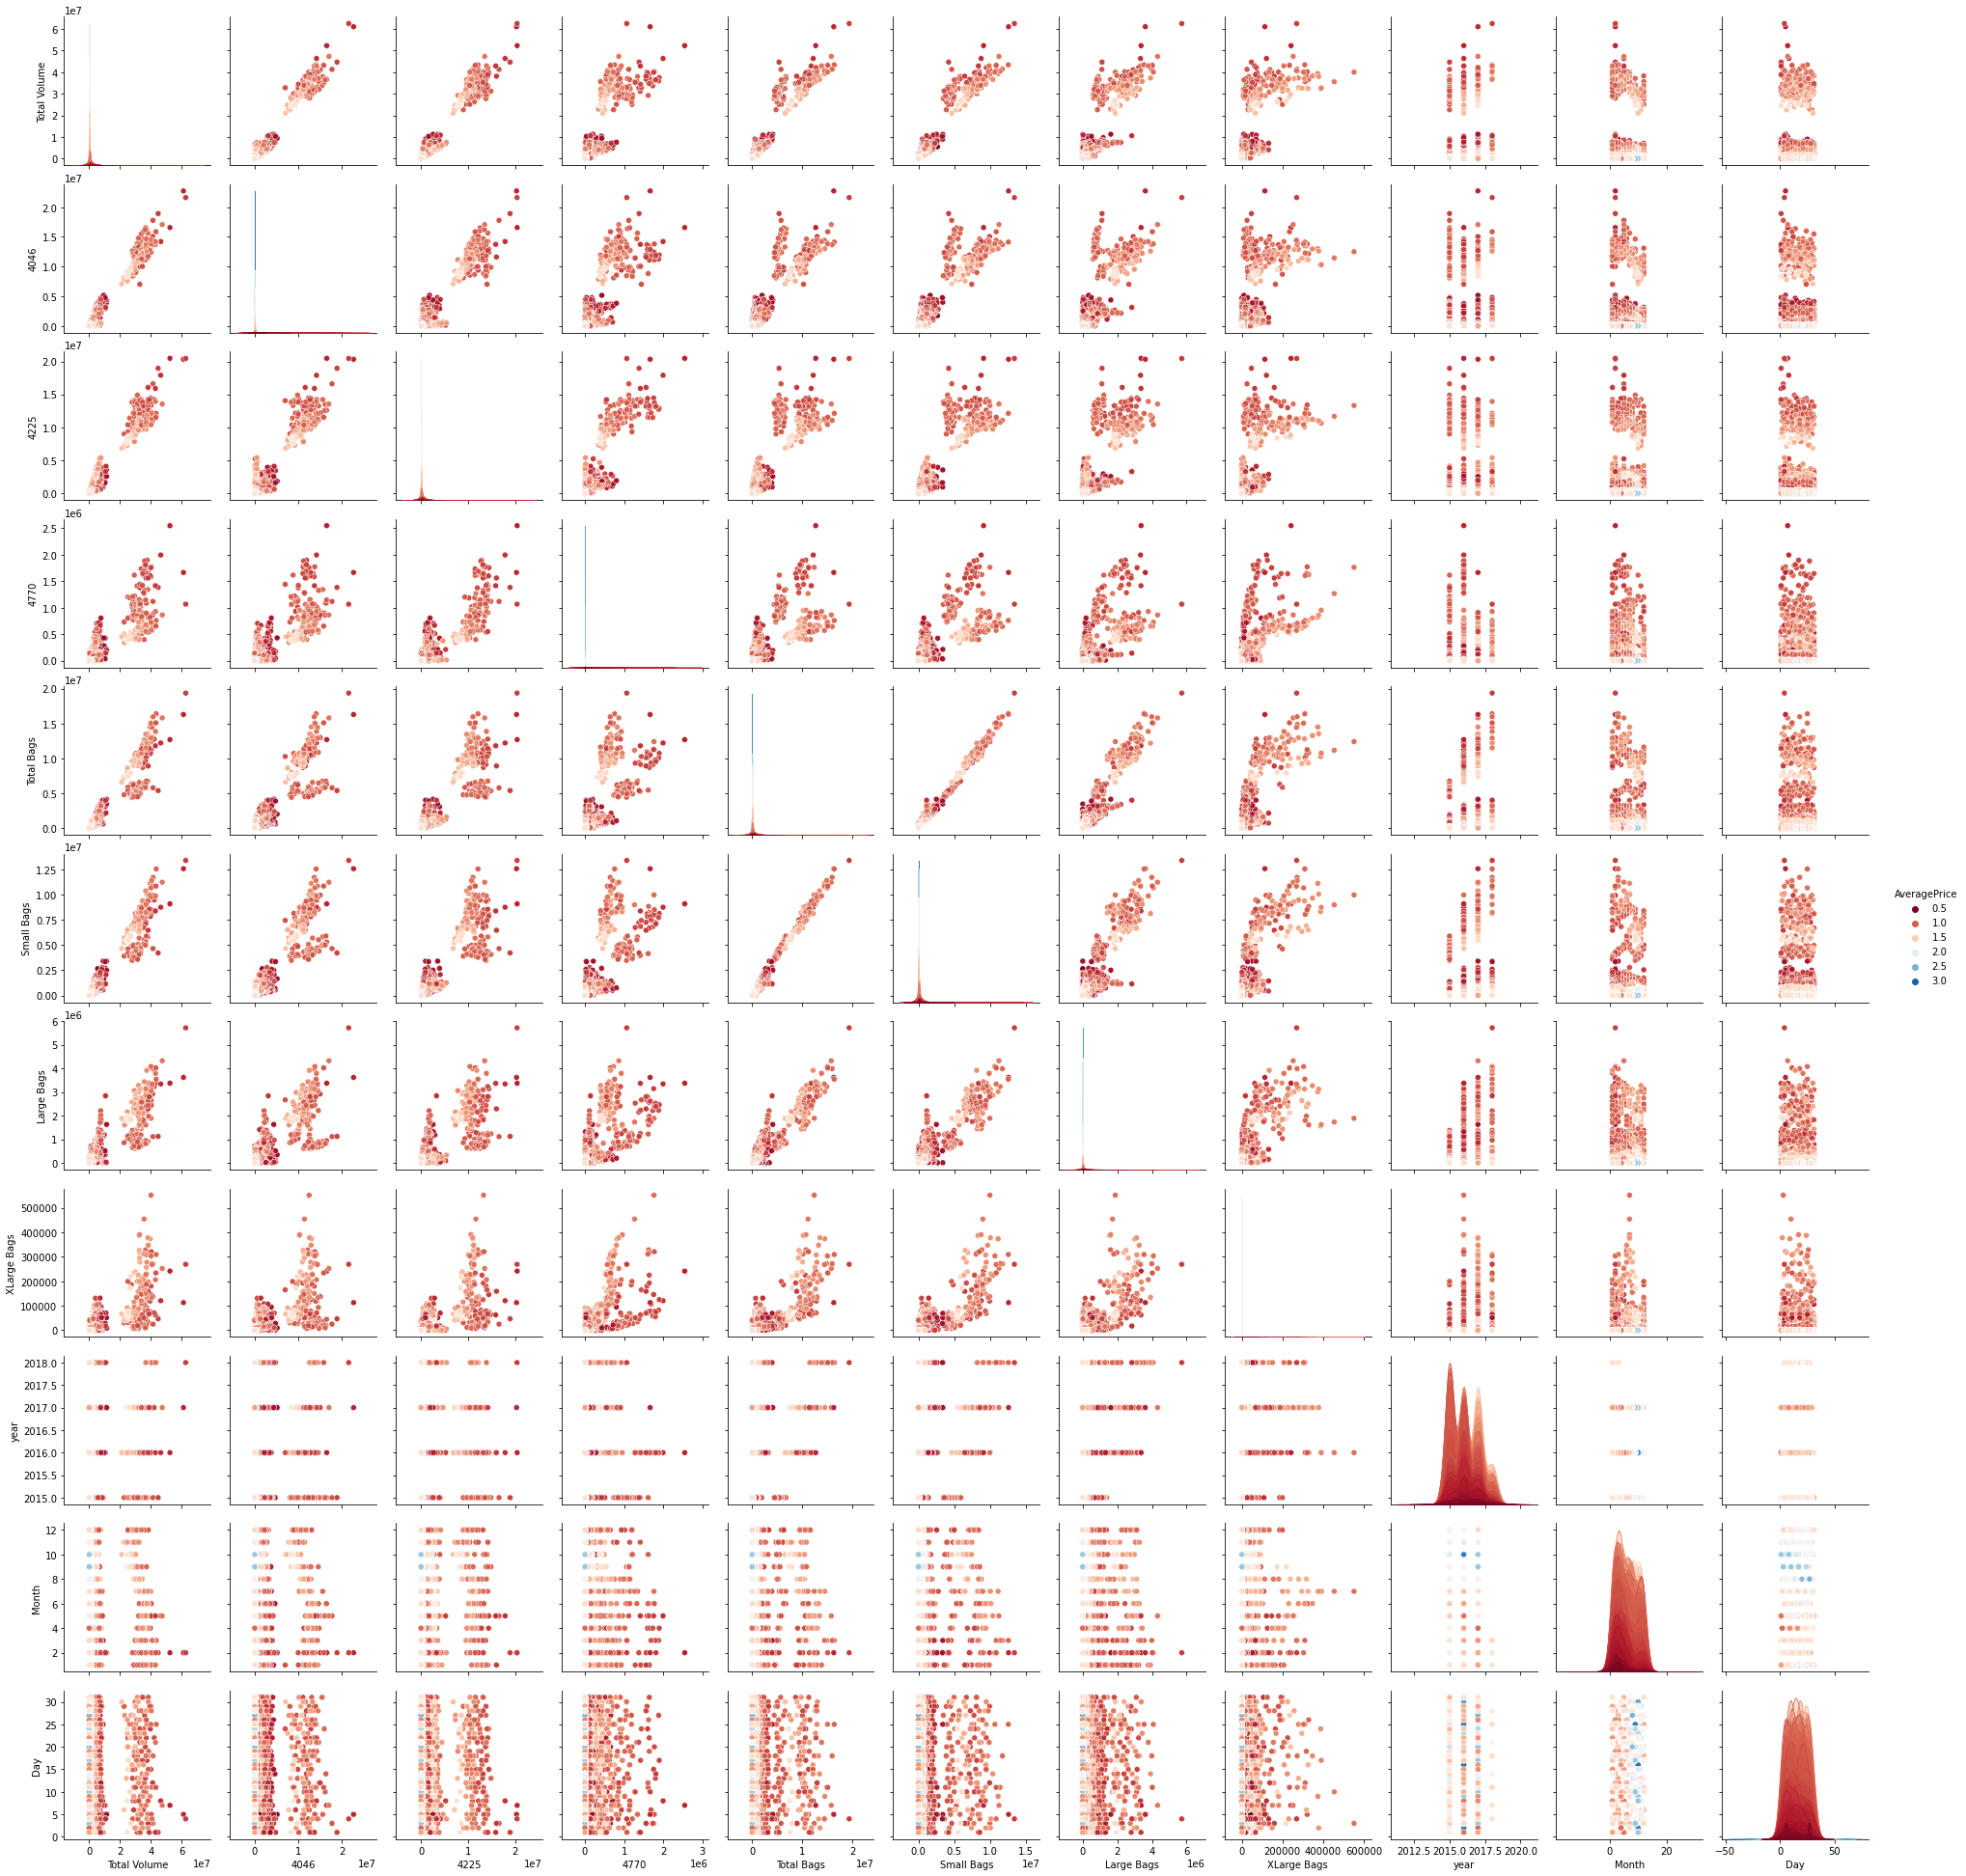

In [47]:
sns.pairplot(df, hue = 'AveragePrice', palette = 'RdBu')

# Removing the OUTLIERS

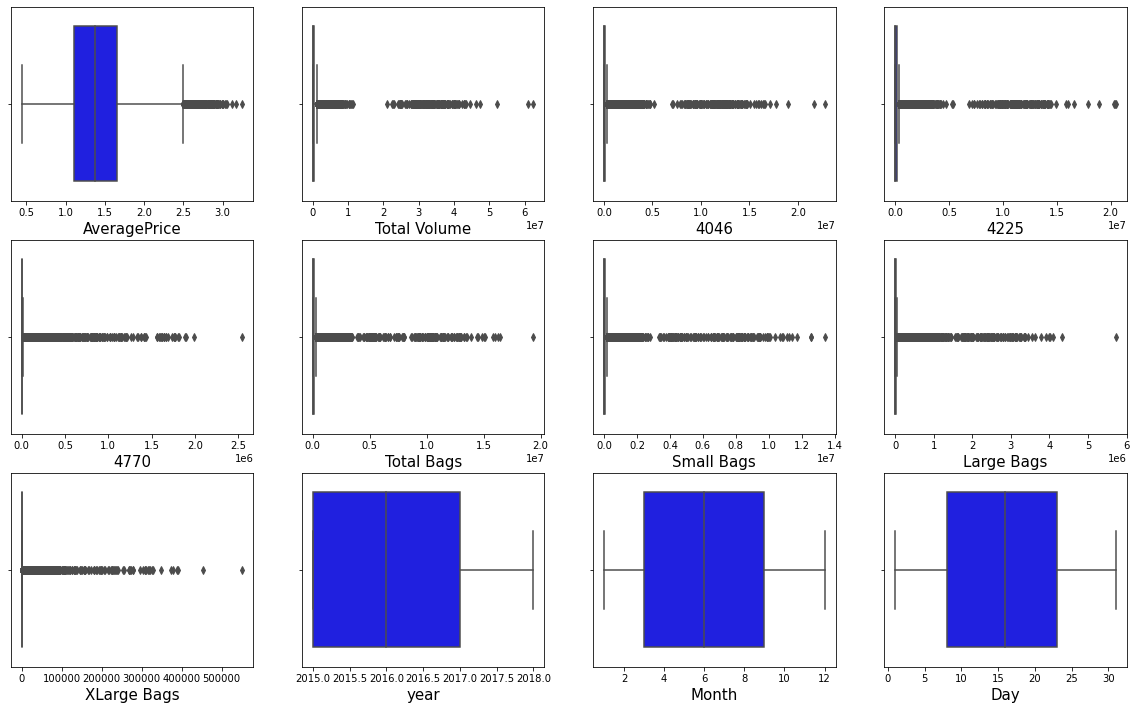

In [58]:
numerical_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']

plt.figure(figsize = (20, 25), facecolor = 'white')

plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6, 4, plotnumber)
        sns.boxplot(df[column], color = 'b')
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1

plt.show()

# Removing Outliers

Z Score Method

In [59]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [60]:
# Features containing outliers

F_S = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [61]:
z = np.abs(zscore(F_S))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [62]:
# Create new dataframe having Z<3

new_df = df[(z < 3).all(axis = 1)] 

new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [63]:
df.shape

(18249, 14)

In [64]:
new_df.shape

(17782, 14)

In [65]:
# Checking the skewness

new_df.skew()


AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

# Removing the Skewness by using YEO-JOHNSON method

In [66]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


scaler = PowerTransformer(method = 'yeo-johnson')
'''''
parameters:

method = 'box-cox' or 'yeo-johnson'
'''''

"''\nparameters:\n\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [67]:
new_df[features] = scaler.fit_transform(new_df[features].values)

new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [68]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

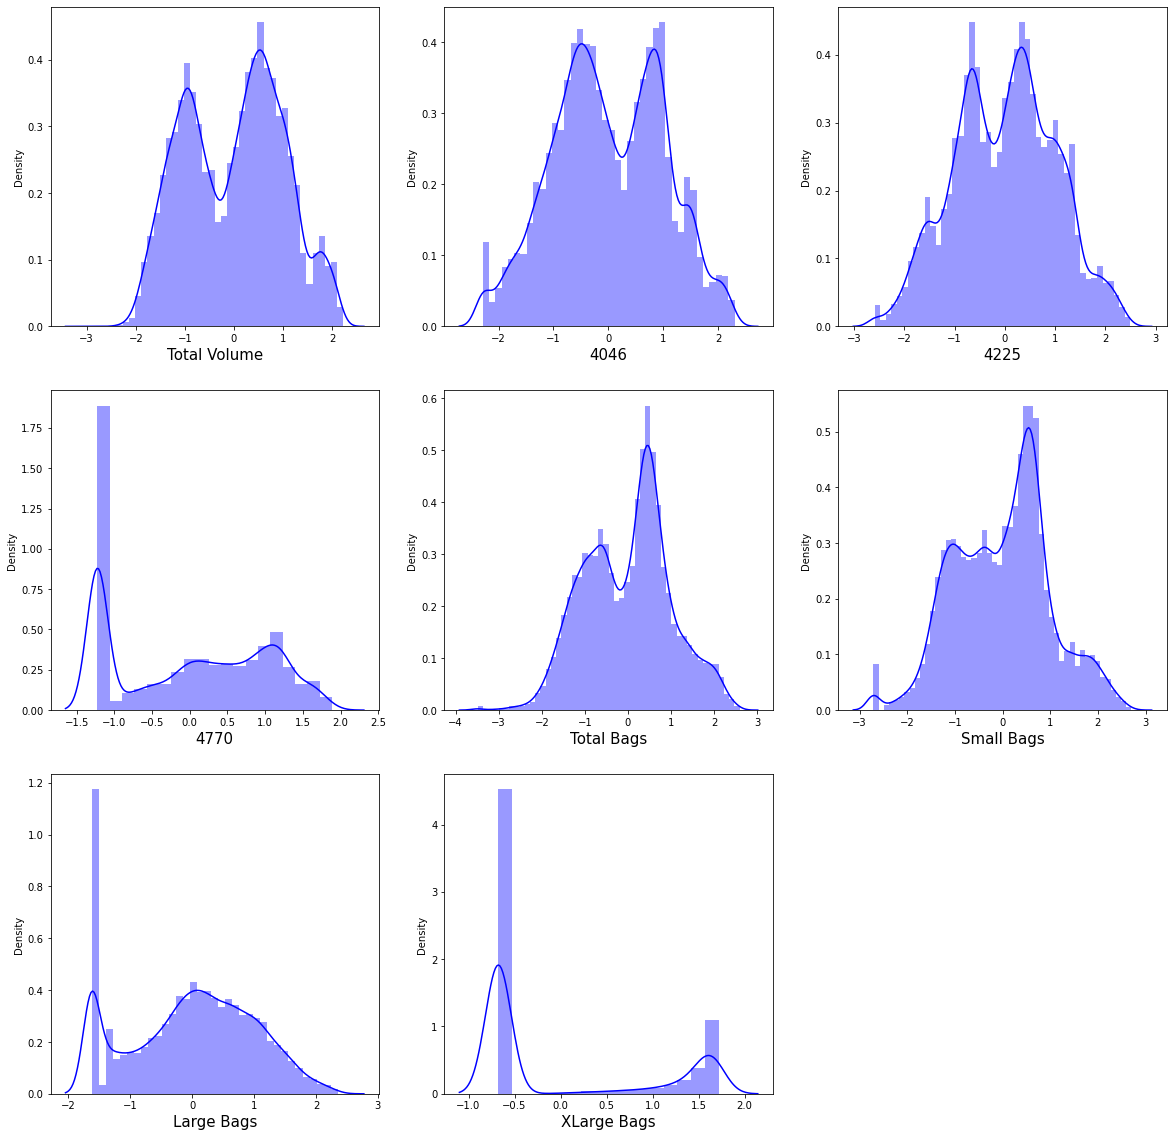

In [69]:
plt.figure(figsize=(20, 20), facecolor = 'white')

plotnumber = 1

for column in new_df[features]:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(new_df[column], color = 'b')
        plt.xlabel(column, fontsize = 15)
    plotnumber += 1

plt.show()

# Encode the catagorical data using label encoder.

In [70]:
# Columns with catagorical data

categorical_col = ["type","region"]

In [71]:
LE = LabelEncoder()

new_df[categorical_col] = new_df[categorical_col].apply(LE.fit_transform)

new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Corelation between target and independent variables


In [73]:
corr = new_df.corr()

corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.387285,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629592,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573880,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.584508,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.616413,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.613698,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.603334,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.452650,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.387285,0.629592,0.573880,0.584508,0.616413,0.613698,0.603334,0.452650,1.000000,-0.665587,0.159574,-0.020865,0.018751,0.010241
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.665587,1.000000,0.007399,0.021970,-0.005044,-0.002469


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day')])

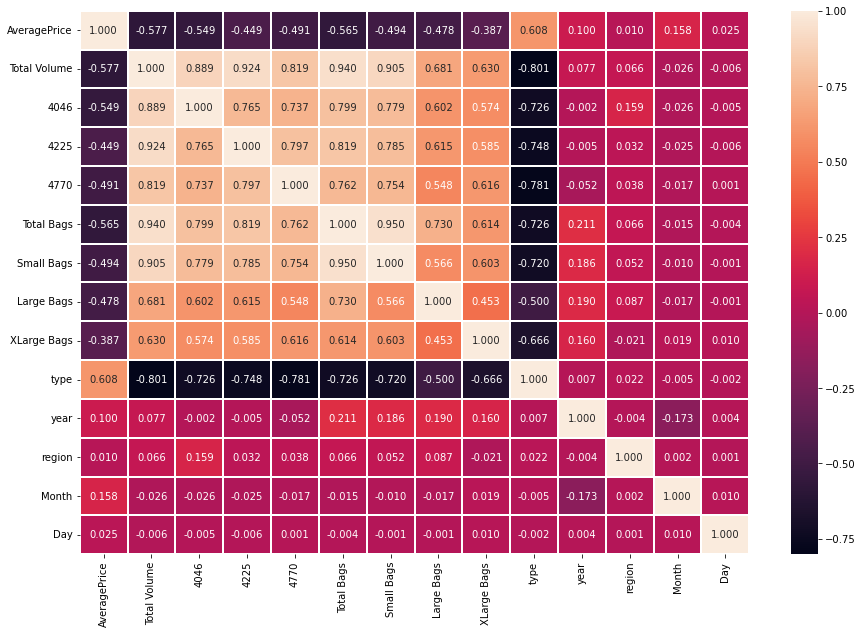

In [74]:
plt.figure(figsize = (15, 10))

sns.heatmap(new_df.corr(), linewidths = 0.2, fmt = '0.3f', annot = True)

plt.yticks(rotation = 0)

# using VIF for solving Multi colinearity problem.

In [75]:
corr['AveragePrice'].sort_values(ascending = False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.387285
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

# Visualization of corelation between label and features.

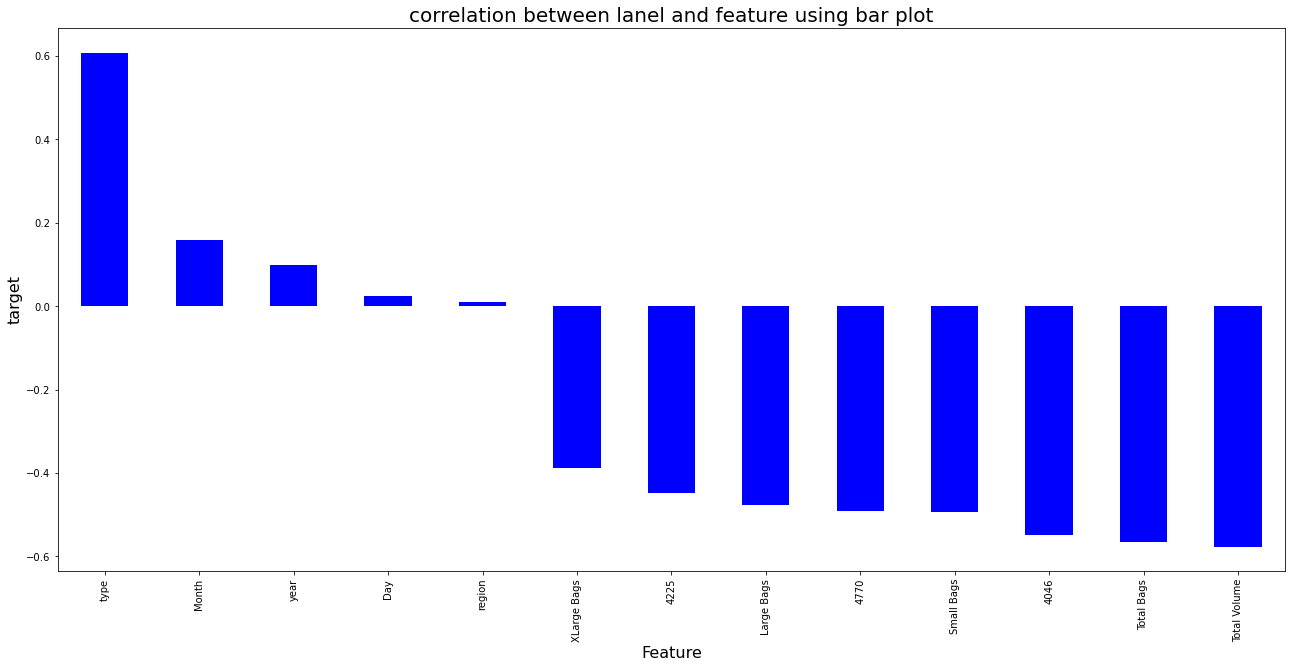

In [76]:
plt.figure(figsize = (22, 10))

new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind = 'bar', color = 'b')

plt.xlabel('Feature',fontsize = 16)

plt.ylabel('target',fontsize = 16)

plt.title('correlation between lanel and feature using bar plot', fontsize = 20)

plt.show()

In [77]:
new_df.drop('Day', axis = 1, inplace = True)

# Regression model  

In [78]:
# seperate features in x & y labels

x = new_df.drop('AveragePrice', axis = 1)

y = new_df['AveragePrice']

In [79]:
x.shape

(17782, 12)

In [80]:
y.shape

(17782,)

In [81]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,0,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,0,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,0,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,0,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,0,11


# Standard scalarization

In [82]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,-1.026443,-1.214908,-1.698613,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,-1.026443,-1.214908,-1.698613,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,-1.026443,-1.214908,-1.698613,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,-1.026443,-1.214908,-1.698613,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,-1.026443,-1.214908,-1.698613,1.358706
...,...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.675702,0.974238,1.979143,1.742552,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.675702,0.974238,1.979143,1.742552,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.675702,0.974238,1.979143,1.742552,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.675702,0.974238,1.979143,1.742552,-1.468572


In [83]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,52.162464,Total Volume
1,7.156609,4046
2,11.180294,4225
3,3.954800,4770
4,34.507417,Total Bags
5,16.640948,Small Bags
6,3.463321,Large Bags
7,2.053488,XLarge Bags
8,3.718421,type
9,1.386914,year


In [84]:
# Drop column Total volume

x.drop('Total Volume', axis = 1, inplace = True)

In [85]:
# check again the VIF values

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,3.741792,4046
1,4.284469,4225
2,3.940626,4770
3,24.482299,Total Bags
4,16.640691,Small Bags
5,3.421445,Large Bags
6,2.039467,XLarge Bags
7,3.502117,type
8,1.384570,year
9,1.079277,region


In [86]:
# Still 2 columns have VIF more than 10 so lets drop another column Total bags

x.drop('Total Bags', axis = 1, inplace = True)

In [87]:
# check VIF values again

vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,3.722981,4046
1,4.139516,4225
2,3.940399,4770
3,4.103561,Small Bags
4,1.866020,Large Bags
5,2.039043,XLarge Bags
6,3.498710,type
7,1.359832,year
8,1.079272,region
9,1.051109,Month


## Now the VIF values have reduced within 10, this means Multicolinearity has been solved, lets start building model.

# Finding Best Random State

In [88]:
maxAcc = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
print('Maximum R2 score is ', maxAcc,' on Random_state ', maxRS)

Maximum R2 score is  0.8738928050407696  on Random_state  49


# we got a max R2 score of 87 % at Random state of 49

In [89]:
# create Train Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)

# Linear regression with Cross_validation score

In [90]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train, y_train)

# predict
predLR = LR.predict(x_test)
print('R2_score:', r2_score(y_test, predLR))
print('MAE:', metrics.mean_absolute_error(y_test, predLR))
print('MSE:', metrics.mean_squared_error(y_test, predLR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking Cross_Validation score for Linear Regression
print('Cross_Validaton_Score', cross_val_score(LR, x, y, cv = 5).mean())

R2_score: 0.5074020315626586
MAE: 0.21880355167313104
MSE: 0.0791339053534056
RMSE: 0.28130749252980375
Cross_Validaton_Score 0.08959563657474097


# Random Forest Regressor

In [91]:
# Checking R2 score for  Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

# predict
pred_RFR = RFR.predict(x_test)
print('R2_Score:', r2_score(y_test, pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:', metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking Cross_Validation score for Random Forest Regression
print('Cross_Validaton_Score', cross_val_score(RFR, x, y, cv = 5).mean())

R2_Score: 0.8816990688325214
MAE: 0.09579306466729146
MSE: 0.019004574298031863
RMSE: 0.13785707924525262
Cross_Validaton_Score 0.21790182714124723


# KNeighbors Regressor

In [92]:
# Checking R2 score for KNN Regressor
knn = KNN()

knn.fit(x_train, y_train)

# predict

predknn = knn.predict(x_test)

print('R2_Score:',r2_score(y_test, predknn))

print('MAE:',metrics.mean_absolute_error(y_test, predknn))

print('MSE:',metrics.mean_squared_error(y_test, predknn))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking Cross_Validaton score for KNN
print('Cross_Validaton_Score', cross_val_score(knn, x, y, cv = 5).mean())

R2_Score: 0.8619460130697228
MAE: 0.10423880037488285
MSE: 0.022177824179943767
RMSE: 0.148922208484644
Cross_Validaton_Score -0.017763112021986615


# Gradient Boosting Regressor

In [93]:
# Checking R2 score for  GradientBoosting Regressor

GB = GradientBoostingRegressor()

GB.fit(x_train, y_train)

# predict

predGB = GB.predict(x_test)

print('R2_Score:',metrics.r2_score(y_test,predGB))

print('MAE:',metrics.mean_absolute_error(y_test, predGB))

print('MSE:',metrics.mean_squared_error(y_test, predGB))

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking Cross_Validaton score for GradientBoosting Regressor
print('Cross_Validaton_Score', cross_val_score(GB, x, y, cv = 5).mean())

R2_Score: 0.7400168527364079
MAE: 0.1548135981000929
MSE: 0.04176525906978961
RMSE:  0.204365503619837
Cross_Validaton_Score 0.3873760558310053


# SVM regressor

In [86]:
# Checking R2 score for Support Vector Machine Regressor

svr = SVR()

svr.fit(x_train, y_train)

# predict

predsvr = svr.predict(x_test)

print('R2_Score:', r2_score(y_test, predsvr))

print('MAE:', metrics.mean_absolute_error(y_test, predsvr))

print('MSE:', metrics.mean_squared_error(y_test, predsvr))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 

print('Cross_Validaton_Score', cross_val_score(svr, x, y, cv = 5).mean())

R2_Score: 0.7928831616525495
MAE: 0.13451884444585027
MSE: 0.03327249670736018
RMSE: 0.1824075017847681
Cross_Validaton_Score 0.0020183180754716145


# Here we can conclude that KNN Regressor is best fit model for our results.

# Hyper Parameter Tuning

In [94]:
parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10, 20, 30, 40]}

In [95]:
GCV = GridSearchCV(KNN(), parameter, cv = 5)

In [96]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [97]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [98]:
MODEL_FINAL = KNN(algorithm = 'brute', n_jobs = 10, n_neighbors = 3, weights = 'distance')

MODEL_FINAL.fit(x_train, y_train)

pred = MODEL_FINAL.predict(x_test)

print('R2_Score:',r2_score(y_test, pred) * 100)

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 88.32952627945775
mean_squared_error: 0.018748152083543787
mean_absolute_error: 0.09263151835093489
RMSE value: 0.13692389157317938


# Saving model

In [99]:
# Save the model as .pkl

joblib.dump(MODEL_FINAL, 'Avocado.pkl')

['Avocado.pkl']

# Predicting Saved Model

In [100]:
model=joblib.load('Avocado.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([1.17754548, 1.66654026, 1.65682794, ..., 1.80542498, 1.58409257,
       1.91880544])

In [101]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted,1.177545,1.66654,1.656828,1.321189,1.254752,2.18244,1.060461,0.840864,1.163785,0.960809,...,1.625873,0.867299,1.171247,1.442611,1.463822,1.445502,0.867708,1.805425,1.584093,1.918805
Original,1.220000,1.64000,1.800000,1.340000,1.360000,2.39000,1.240000,0.780000,1.090000,0.940000,...,1.520000,0.930000,1.190000,1.200000,1.500000,1.410000,0.890000,1.810000,1.550000,1.970000


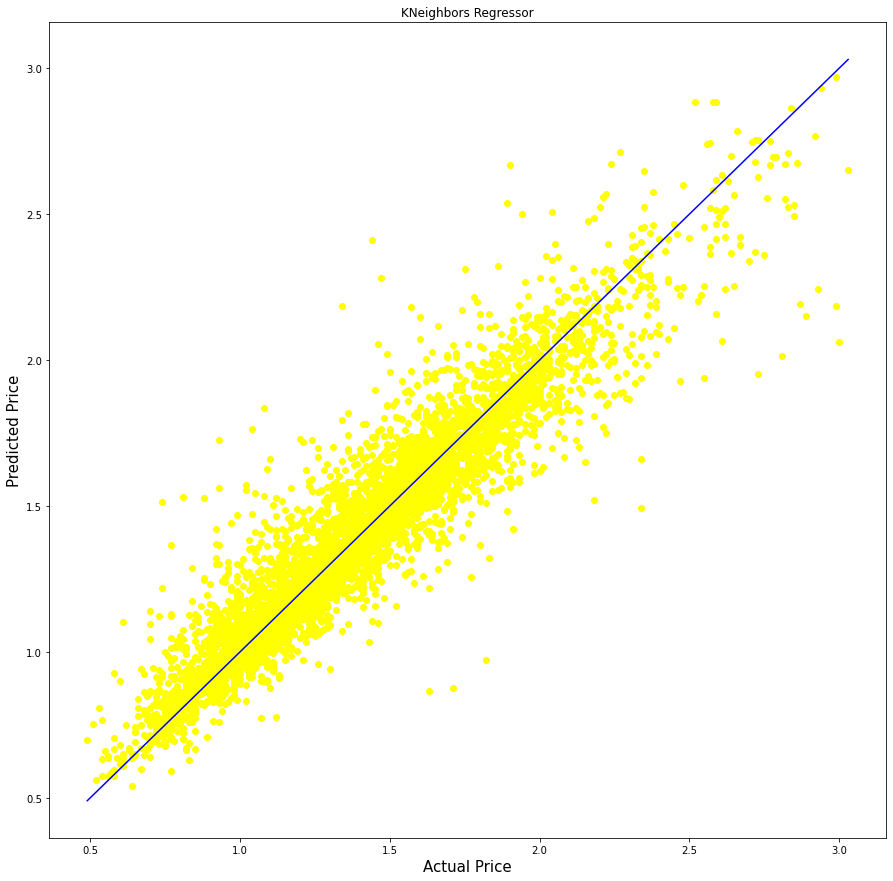

In [102]:
plt.figure(figsize=(15, 15))

plt.scatter(y_test, prediction, c ='Yellow')

plt1 = max(max(prediction), max(y_test))

plt2 = min(min(prediction), min(y_test))

plt.plot([plt1, plt2], [plt1, plt2], 'b-')

plt.title('KNeighbors Regressor')

plt.xlabel('Actual Price', fontsize = 15)

plt.ylabel('Predicted Price', fontsize = 15)

plt.show()

# As we can see in above plot Average price is pretty much linear to Scattered points i.e the predicted price.

# Regional Classification model Prediction 

In [103]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,0,2015,0,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,0,2015,0,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,0,2015,0,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,0,2015,0,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,0,2015,0,11


In [104]:
# splitting the values to x & y for training and testing purpose

x_c = new_df.drop(columns = ['region'])

y_c = new_df[['region']]

print(x_c.shape)

print(y_c.shape)

(17782, 12)
(17782, 1)


# Data Normalization

In [105]:
sc = StandardScaler()

sc.fit_transform(x_c)

x_c = pd.DataFrame(x_c, columns = x_c.columns)

# Test Train Split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.30 ,random_state = 49)

# Logistic Regression for Region

In [107]:
LR = LogisticRegression()

LR.fit(x_train, y_train)

predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))

print(confusion_matrix(y_test, predLR))

print(classification_report(y_test, predLR))

0.20393626991565136
[[36  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  1  0 ... 18  8  0]
 [ 0  4  4 ...  0  2  8]]
              precision    recall  f1-score   support

           0       0.22      0.32      0.26       114
           1       0.10      0.22      0.13        88
           2       0.15      0.18      0.16        90
           3       0.08      0.06      0.07       102
           4       0.11      0.11      0.11       102
           5       0.04      0.06      0.05       101
           6       0.28      0.34      0.31        85
           7       0.35      0.62      0.45        93
           8       0.43      0.40      0.41       112
           9       0.28      0.38      0.32        98
          10       0.15      0.21      0.17        99
          11       0.20      0.20      0.20       107
          12       0.12      0.24      0.16       107
          13       0.00      0.00      0.00        88
          14 

# Decision tree Classifier

In [108]:
DTC = DecisionTreeClassifier()

DTC.fit(x_train, y_train)

predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))

print(confusion_matrix(y_test, predDTC))

print(classification_report(y_test, predDTC))

0.7900656044985942
[[87  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  4]
 [ 0  0 82 ...  0  0  1]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 71  0]
 [ 0  1  1 ...  0  0 65]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       114
           1       0.63      0.64      0.63        88
           2       0.88      0.91      0.90        90
           3       0.77      0.77      0.77       102
           4       0.79      0.82      0.81       102
           5       0.67      0.63      0.65       101
           6       0.95      0.89      0.92        85
           7       0.82      0.85      0.84        93
           8       0.93      0.89      0.91       112
           9       0.74      0.80      0.77        98
          10       0.67      0.66      0.66        99
          11       0.85      0.89      0.87       107
          12       0.93      0.86      0.89       107
          13       0.67      0.72      0.69        88
          14  

# SVM classifier

In [109]:
svc = SVC()

svc.fit(x_train,y_train)

predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))

print(confusion_matrix(y_test, predsvc))

print(classification_report(y_test, predsvc))

0.015745079662605434
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00       101
           6       0.00      0.00      0.00        85
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00        98
          10       0.00      0.00      0.00        99
          11       0.00      0.00      0.00       107
          12       0.00      0.00      0.00       107
          13       0.00      0.00      0.00        88
          14       0.00      0.00      0.00     

# Gradient Boosting Classifier

In [110]:
GB = GradientBoostingClassifier()

GB.fit(x_train, y_train)

predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))

print(confusion_matrix(y_test, predGB))

print(classification_report(y_test, predGB))

0.8279287722586691
[[95  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 84 ...  0  0  1]
 ...
 [ 0  0  0 ... 58  1  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  1  2 ...  0  0 68]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       114
           1       0.63      0.57      0.60        88
           2       0.92      0.93      0.93        90
           3       0.82      0.74      0.78       102
           4       0.89      0.87      0.88       102
           5       0.74      0.74      0.74       101
           6       0.99      0.94      0.96        85
           7       0.86      0.89      0.87        93
           8       0.99      0.95      0.97       112
           9       0.85      0.86      0.85        98
          10       0.70      0.70      0.70        99
          11       0.88      0.85      0.87       107
          12       0.91      0.91      0.91       107
          13       0.70      0.78      0.74        88
          14  

In [111]:
# Cross_Validation score for Decision Tree Classifier

print(cross_val_score(DTC,x_c,y_c,cv=5).mean())

# Cross_Validation score for Logistic Regression 
print(cross_val_score(LR,x_c,y_c,cv=5).mean())

# Cross_Validation score for Support Vector  Classifier
print(cross_val_score(svc,x_c,y_c,cv=5).mean())

# Cross_Validation score for Gradient Boosting Classifier
print(cross_val_score(GB, x_c, y_c, cv=5).mean())

0.5344690028028194
0.12169715255933182
0.02266310224013677
0.5947555051542089


# As we can see above Gradient Boosting Classifier is best model

# Hyper Parameter tuning for Gradient Boosting Classifier

In [112]:
parameters = {'n_estimators':[100],
             'max_features':["auto"],
             'max_leaf_nodes':[10, 20]}

In [113]:
GCV = GridSearchCV(GradientBoostingClassifier(), parameters, cv = 5)

In [114]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['auto'], 'max_leaf_nodes': [10, 20],
                         'n_estimators': [100]})

In [115]:
GCV.best_params_

{'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 100}

In [116]:
Region = GradientBoostingClassifier(max_features = 'auto', max_leaf_nodes = 20, n_estimators = 100)

Region.fit(x_train, y_train)

pred = Region.predict(x_test)

acc = accuracy_score(y_test, pred)

print(acc * 100)

82.96157450796626


# Plotting ROC-AUC curve for best model

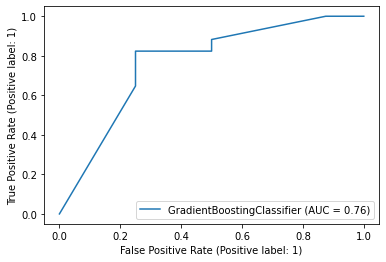

In [118]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection

x,y = datasets.make_classification (random_state = 49)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state = 49)

df = GradientBoostingClassifier(random_state = 49)

df.fit(x_train, y_train)

metrics.plot_roc_curve(df, x_test, y_test)

plt.show()

In [119]:
# Save the model as .pkl

joblib.dump(Region,"Region.pkl")

['Region.pkl']